In [ ]:
#한글 폰트 사용 : colab , 런타임 다시 시작 하기
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


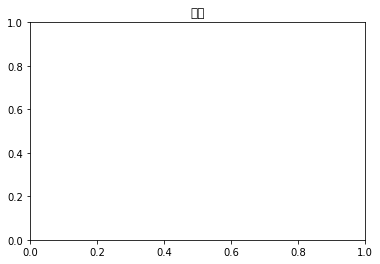

In [ ]:
plt.title('한글')
plt.show()

### 데이터 가져오기

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/20_부산대수업/2022_기초프로그래밍/data/mbc.csv') 
df.head()

,순위,기사제목,댓글수,구분
0,1,이재명 접전 여론조사에 현장 반응은 많이 달라,285,기사
1,2,울먹인 박지현‥민주당에게 마지막 기회를 달라,262,기사
2,3,일본인 55% 한일관계 개선 기대‥최근 조사보다 긍정 답변 높아,176,기사
3,4,권성동 정호영 자진사퇴 늦었다고 생각하지 않는다,146,기사
4,5,중국 내정 간섭 마라 반발‥한국은 분리 대응,120,동영상 뉴스


In [ ]:
ds = df['구분'].value_counts()
ds

In [ ]:
plt.bar(ds.index, ds)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### matplotlib.pyplot 모듈 기본 그래프 그리기
+ 기본그래프 그리기
  + plot() 함수는 리스트의 값들이 y 값들이라고 가정하고, x 값 [0, 1, 2, 3]을 자동
  + show() 함수는 그래프를 화면에 나타나도록함
+ 그래프 제목 추가
   + title() 함수 : 그래프의 제목 설정
   + xlabel() 함수: 그래프의 x축에 대한 제목을 표시
   + ylabel() 함수: 그래프의 y축에 대한 제목을 표시
+ 선 모양 정하기
  + **색상**
  - b(파란색), g(초록색), r(빨간색), c(청록색), y(노란색), k(검은색), w(흰색)
  + **마커**
  - o(원), v(역삼각형), ^(삼각형), s(네모), +(플러스), .(점)
  + **선스타일**
  - \-(solid line), --(dashed line ), -. (dash-dot line), : (dotted line )
+ 크기 지정하기 
 - figure() :  figsize를 이용하여 가로, 세로 길이 조절 가능 (inch 단위)
+ x축 눈금지정하기
 + xticks() :  X축에 눈금을 표시
  + labels 파라미터를 사용하면 눈금 레이블을 문자열의 형태로 지정
  + rotation 파라미터를 사용하면 눈금 레이블 회전

In [ ]:
# 수치데이터를 갖고 그래프를 그려준다.
df.plot()
plt.show() 

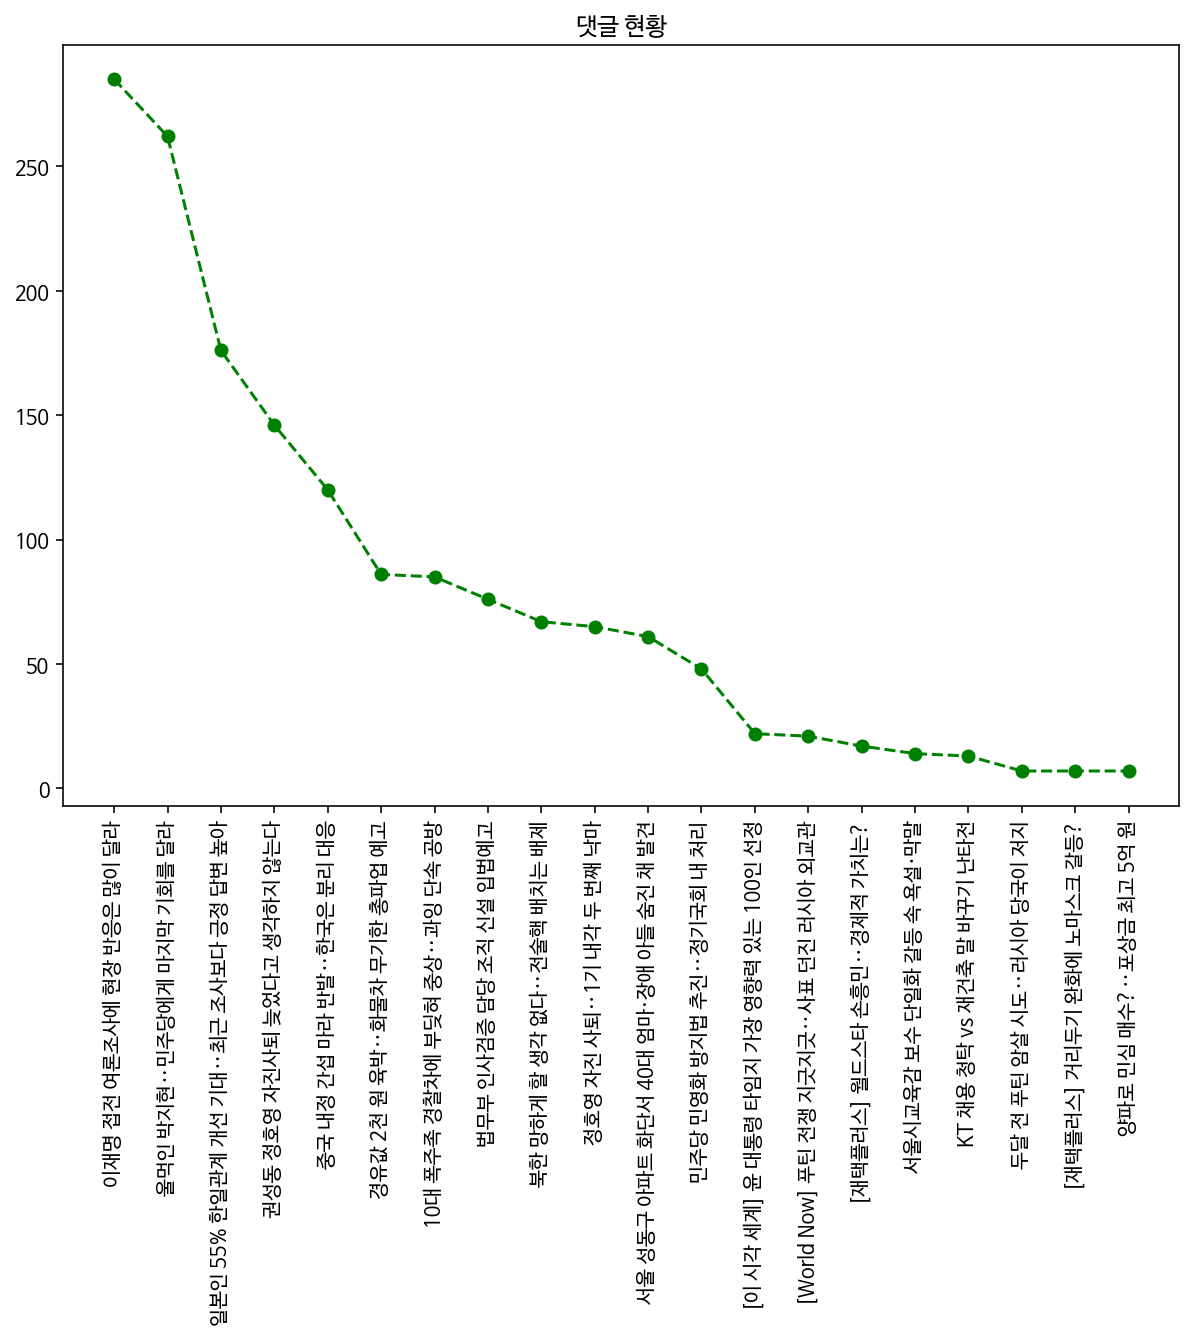

In [ ]:
plt.plot(df['기사제목'],df['댓글수'],'go--',label = '댓글꺽은선')
plt.bar(df['기사제목'],df['댓글수'], label = '댓글막대')
plt.title('댓글현황', fontsize=20)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

### Pandas  plot()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      20 non-null     int64 
 1   기사제목    20 non-null     object
 2   댓글수     20 non-null     int64 
 3   구분      20 non-null     object
dtypes: int64(2), object(2)
memory usage: 768.0+ bytes


## seaborn
* matplotlib의 상위 호환 데이터 시각화를 위한 라이브러리
* 데이터프레임으로 다양한 통계 지표를 낼 수 있는 시각화 차트를 제공하기 때문에 데이터 분석에 활발히 사용되고 있는 라이브러리

In [ ]:
import seaborn as sns

### barplot
+ 댓글 수가 평균 댓글수보다 많은 기사

In [ ]:
df.columns

Index(['순위', '기사제목', '댓글수', '구분'], dtype='object')

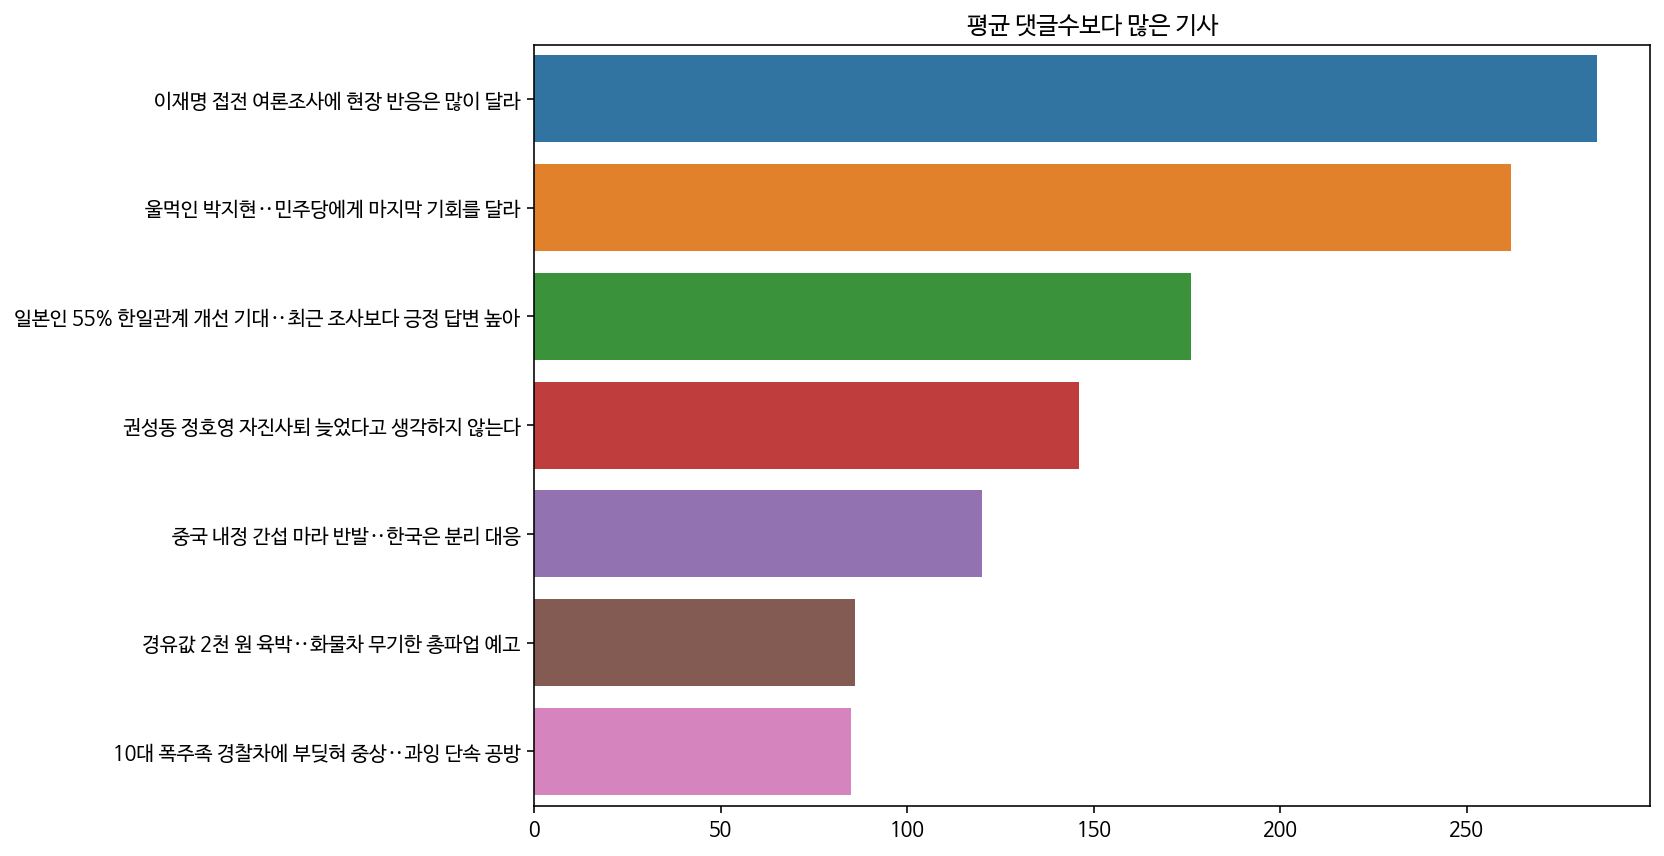

In [ ]:
sns.barplot(x = '구분' , y = '댓글수', dtype = 'object')

In [ ]:
sns.barplot(x = '기사제목' , y = '댓글수', data = df)
plt.xticks(rotation = 90)
plt.show()

sns.barplot(y = '기사제목' , x = '댓글수', data = df)
plt.xticks(rotation = 90)
plt.label('')
plt.label('')
plt.show()

In [ ]:
df2 = df[df['댓글수'] > df['댓글수'].mean()]
df2

### Countplot
* 구분별 기사수

In [ ]:
df['구분'].value_counts()

동영상 뉴스    11
기사         9
Name: 구분, dtype: int64

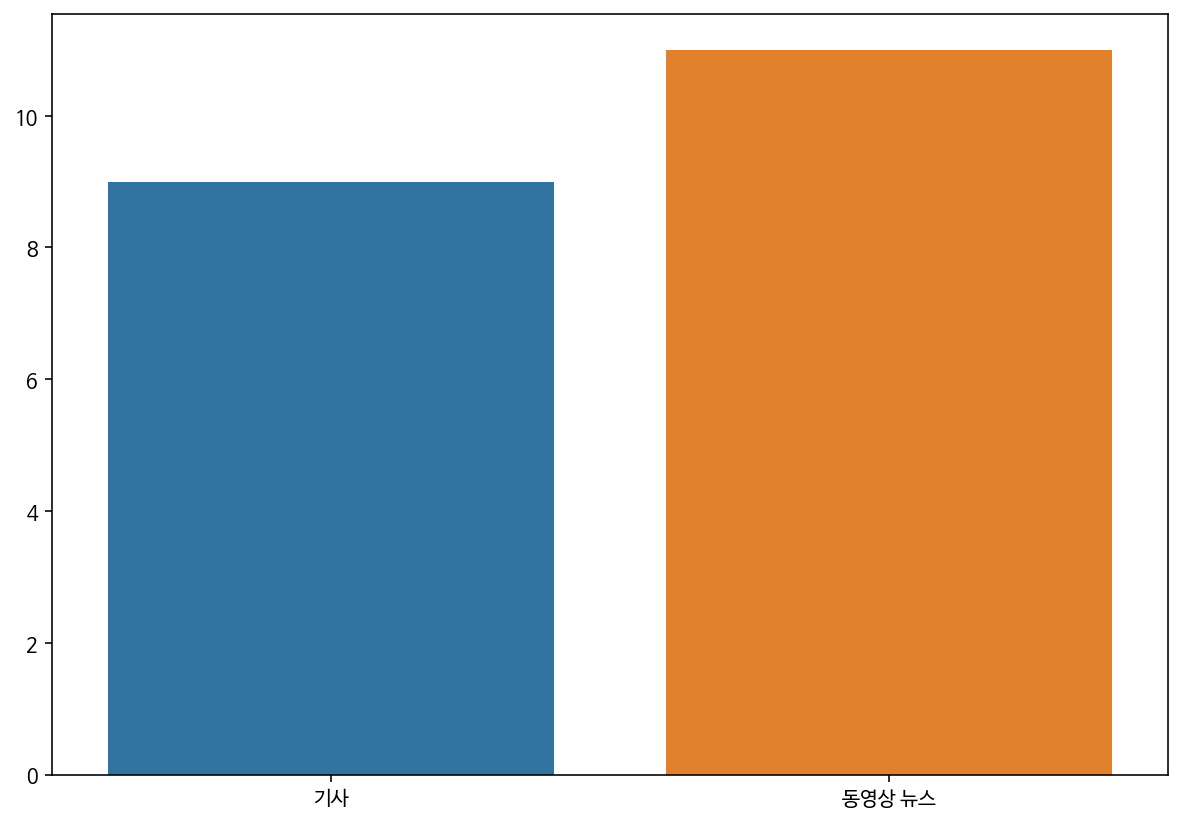

In [ ]:
sns.countplot(x ='구분',data = df)
plt.show()

### displot
* matplotlib의 hist 그래프와 kdeplot을 통합한 그래프

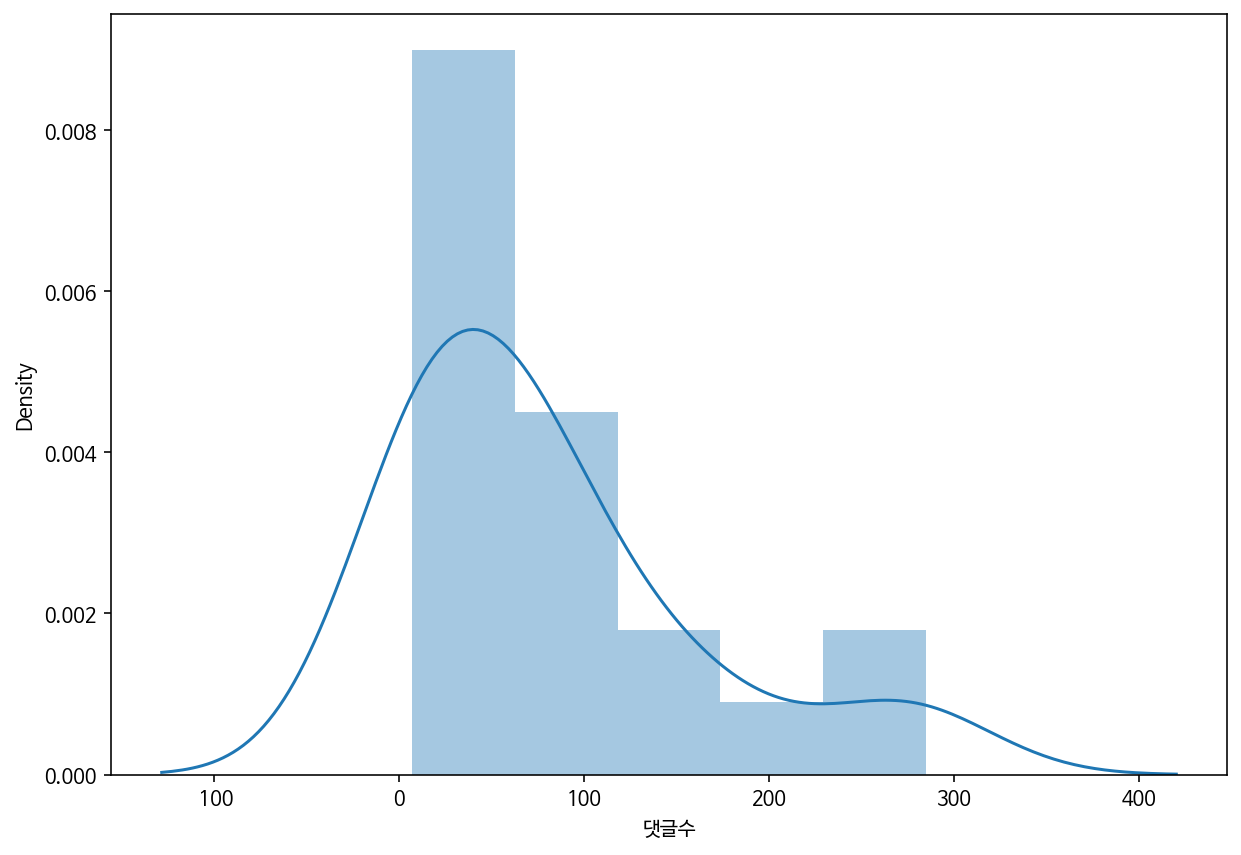

In [ ]:
plt.figure(figsize=(10,7)) 
sns.distplot(df['댓글수'], kde = True)
plt.show()

### heatmap
* 다양한 값을 갖는 숫자 데이터를 열분포 형태와 같이 색상을 이용해서 시각화

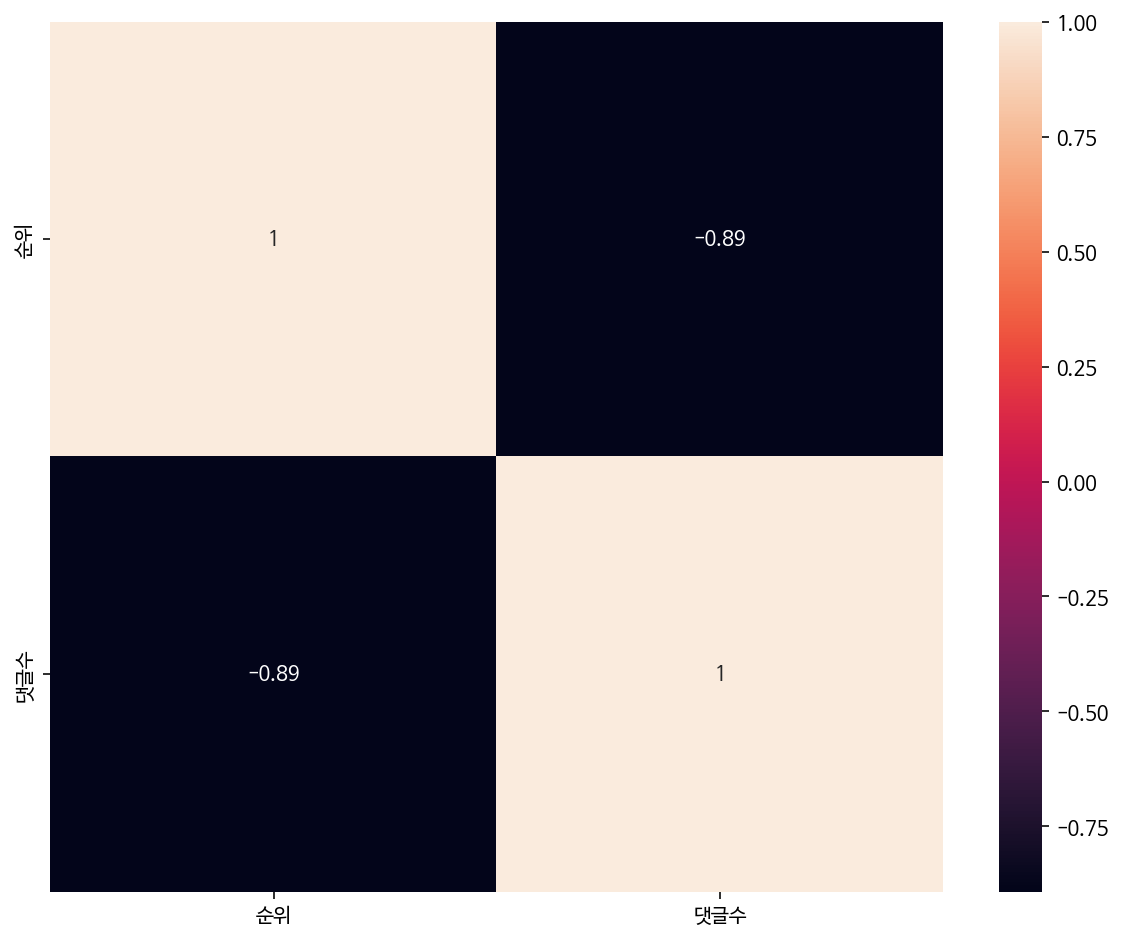

In [ ]:
plt.rcParams['axes.unicode_minus'] = False  
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()